In [26]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [27]:
import  pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [28]:
import numpy as np
from numpy import genfromtxt
my_matches_data= pd.read_csv ("C:/Users/negin/Desktop/matches.csv")
k=my_matches_data.keys()
processed_data=[]
for i in range(np.shape(my_matches_data)[0]):

        arr=(my_matches_data[k[0]])[i].split(";")
        arr[16]=arr[16].replace(";","")
        arr[6]=arr[6].replace("\"","")
        arr[7]=arr[7].replace("\"","")
        arr_new=np.array([arr[6], arr[7],arr[8],arr[9],arr[16]])
        processed_data.append(arr_new)

        
processed_data=np.asarray(processed_data)

In [29]:
premier_league=[]
for i in range(np.shape(processed_data)[0]):
    if(processed_data[i,4]==str(148)):
        premier_league.append(processed_data[i,:])     
premier_league=np.asarray(premier_league)
  
print(premier_league)    

[['Crystal Palace' 'Southampton' '0' '1' '148']
 ['Watford' 'Manchester City' '0' '6' '148']
 ['Liverpool' 'Burnley' '1' '1' '148']
 ...
 ['Manchester Utd' 'Liverpool' 'NA' 'NA' '148']
 ['Crystal Palace' 'Manchester City' 'NA' 'NA' '148']
 ['Sheffield Utd' 'Arsenal' 'NA' 'NA' '148']]


In [30]:
new_premier_league=pd.DataFrame(premier_league)
new_premier_league.columns=['Home_team', 'Away_team','home_goal','away_goal','league_id']
print(new_premier_league)

          Home_team        Away_team home_goal away_goal league_id
0    Crystal Palace      Southampton         0         1       148
1           Watford  Manchester City         0         6       148
2         Liverpool          Burnley         1         1       148
3     Sheffield Utd          Norwich         0         1       148
4           Chelsea          Arsenal         0         0       148
..              ...              ...       ...       ...       ...
623         Chelsea        Newcastle        NA        NA       148
624     Bournemouth          Norwich        NA        NA       148
625  Manchester Utd        Liverpool        NA        NA       148
626  Crystal Palace  Manchester City        NA        NA       148
627   Sheffield Utd          Arsenal        NA        NA       148

[628 rows x 5 columns]


In [31]:
del new_premier_league['league_id']

In [32]:
#Expected number of goals for home goals and away goals

away_goal=[]
home_goal=[]
for i in range(np.shape(new_premier_league["away_goal"])[0]):
    if(new_premier_league["away_goal"][i]!="NA"):
        away_goal.append(int(new_premier_league["away_goal"][i]))
for i in range(np.shape(new_premier_league["home_goal"])[0]):
    if(new_premier_league["home_goal"][i]!="NA"):
        home_goal.append(int(new_premier_league["home_goal"][i]))
mean_home_goals=np.mean(home_goal)
mean_away_goals=np.mean(away_goal)

print(mean_home_goals)
print(mean_away_goals)

1.6019417475728155
1.2281553398058251


Text(0, 0.5, 'Number of Games')

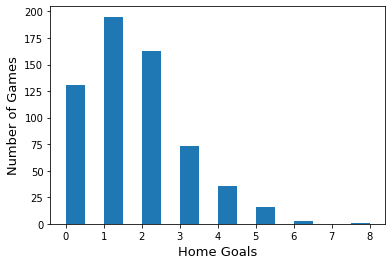

In [33]:
#Task1 histogram diagram for Home Goals
plt.hist(home_goal,bins=16)
plt.xlabel("Home Goals",size=13)
plt.ylabel("Number of Games",size=13)
#The distribution looks like Poisson distribution,with the expected number of goals 
#1.6019417475728155 The poisson dist for this mean value is ploted in the following which is consisten withis histogram diagram.

Text(0, 0.5, 'Number of Games')

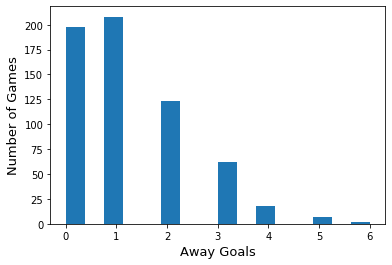

In [34]:
#Task1 histogram diagram for Away Goals
plt.hist(away_goal,bins=16)
plt.xlabel("Away Goals",size=13)
plt.ylabel("Number of Games",size=13)
#The distribution looks like Poisson distribution,with the expected number of goals 
#1.2281553398058251 The poisson dist for this mean value is ploted in the following which is consisten withis histogram diagram.

Text(0, 0.5, 'Number of Games')

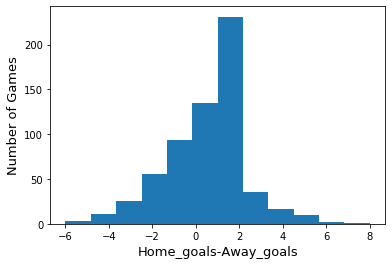

In [35]:
a=np.array(home_goal)
b=np.array(away_goal)
c=a-b
#Task1 histogram diagram for (Home Goals-Away Goals)
plt.hist(c,bins=12)
plt.xlabel("Home_goals-Away_goals",size=13)
plt.ylabel("Number of Games",size=13) 
#This histogram looks like a skellam distribution which is the difference between two poisson distributions. 

In [36]:
import matplotlib.pyplot as plt

In [37]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [38]:
from scipy.stats import poisson,skellam

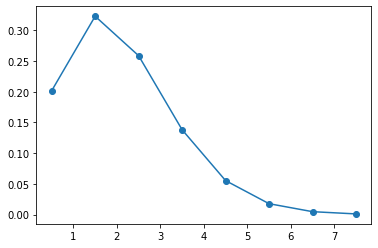

In [39]:
#Poisson distribution for mean value of the home wins

poisson_pred1 = np.column_stack([[poisson.pmf(i, mean_home_goals) for i in range(8)]])
pois1= plt.plot([i-0.5 for i in range(1,9)], poisson_pred1[:,0],
                  linestyle='-', marker='o')

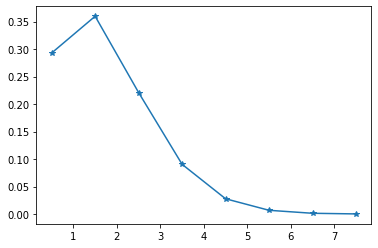

In [40]:
#Poisson distribution for mean value of the away wins
poisson_pred2 = np.column_stack([[poisson.pmf(i, mean_away_goals) for i in range(8)]])
pois2= plt.plot([i-0.5 for i in range(1,9)], poisson_pred2[:,0],
                  linestyle='-', marker='*')

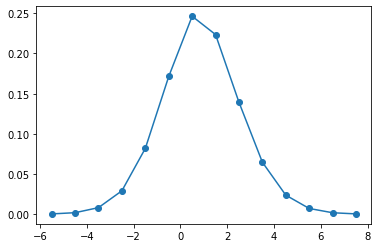

In [41]:
skellam_pred = [skellam.pmf(i,  mean_home_goals,  mean_away_goals) for i in range(-6,8)]
plt.plot([i+0.5 for i in range(-6,8)], skellam_pred,
                  linestyle='-', marker='o')

In [44]:
bets1_data= pd.read_csv("C:/Users/negin/Desktop/premierlig.csv",sep=';')
bets1_data.replace("\,","\.")
#print(bets1_data)

,match_id,odd_bookmakers,odd_epoch,variable,value,league id
0,150844,bwin,1486711426,odd_1,"2,55",148
1,150844,bwin,1486711426,odd_x,"3,3",148
2,150844,bwin,1486711426,odd_2,"2,4",148
3,158697,BetOlimp,1488204395,odd_1,"1,17",148
4,158697,bwin,1488204395,odd_1,"1,15",148
...,...,...,...,...,...,...
11006,178783,bwin,1550904995,odd_x2,"1,67",148
11007,178783,KTO,1550904995,ah-2.5_1,"9,8",148
11008,178783,KTO,1550904995,ah-2.5_2,"1,07",148
11009,178783,Coolbet,1550904995,ah-2_1,"9,3",148


In [45]:
#data for the bookmaker BetOlimp and English Premier league
BetOlimp=bets1_data.loc[bets1_data['odd_bookmakers'] == 'BetOlimp']
BetOlimp=BetOlimp.loc[BetOlimp['variable'].isin(['odd_1', 'odd_2', 'odd_x']) ]

BetOlimp=pd.DataFrame(BetOlimp)
BetOlimp=BetOlimp.sort_values(by=['match_id','variable'])
BetOlimp.value=BetOlimp.value.str.replace(',', '.', regex=False)

#print(BetOlimp)

In [46]:
#data for the bookmaker bwin and English Premier league
bwin=bets1_data.loc[bets1_data['odd_bookmakers'] == 'bwin']
bwin=bwin.loc[bwin['variable'].isin(['odd_1', 'odd_2', 'odd_x']) ]
bwin=pd.DataFrame(bwin)
bwin=bwin.sort_values(by=['match_id','variable'])
bwin.value=bwin.value.str.replace(',', '.', regex=False)

#print(bwin)

In [47]:
#data for the bookmaker KTO and English Premier league
KTO=bets1_data.loc[bets1_data['odd_bookmakers'] == 'KTO']
KTO=KTO.loc[KTO['variable'].isin(['odd_1', 'odd_2', 'odd_x']) ]

KTO=KTO.sort_values(by=['match_id','variable'])
KTO=pd.DataFrame(KTO)
KTO.value=KTO.value.str.replace(',', '.', regex=False)

#print(KTO)

In [48]:
#data for the bookmaker Coolbet and English Premier league
Coolbet=bets1_data.loc[bets1_data['odd_bookmakers'] == 'Coolbet']
Coolbet=Coolbet.loc[Coolbet['variable'].isin(['odd_1', 'odd_2', 'odd_x']) ]
Coolbet=Coolbet.sort_values(by=['match_id','variable'])
Coolbet=pd.DataFrame(Coolbet)
Coolbet.value=Coolbet.value.str.replace(',', '.', regex=False)
#print(Coolbet)

In [49]:
BetOlimp['value'] = pd.to_numeric(BetOlimp['value'])
bwin['value'] = pd.to_numeric(bwin['value'])
KTO['value'] = pd.to_numeric(KTO['value'])
Coolbet['value'] = pd.to_numeric(Coolbet['value'])
x=1/ BetOlimp['value'] 
BetOlimp['probability'] =x
y=1/ bwin['value'] 
bwin['probability'] =y
z=1/ KTO['value'] 
KTO['probability'] =z
w=1/ Coolbet['value'] 
Coolbet['probability'] =w

In [50]:
from numpy import int64

In [51]:
#Task 2-1,2 probability of home win, away win and tie for BetOlimp
home_wins_BetOlimp=BetOlimp.loc[BetOlimp['variable'] == 'odd_1']
away_wins_BetOlimp=BetOlimp.loc[BetOlimp['variable'] == 'odd_2']
tie_BetOlimp=BetOlimp.loc[BetOlimp['variable'] == 'odd_x']

probability_home_wins_BetOlimp=home_wins_BetOlimp['probability']
probability_home_wins_BetOlimp=pd.DataFrame(probability_home_wins_BetOlimp)
probability_home_wins_BetOlimp=np.asarray(probability_home_wins_BetOlimp)
#print(probability_home_wins_BetOlimp)

probability_away_wins_BetOlimp=away_wins_BetOlimp['probability']
probability_away_wins_BetOlimp=pd.DataFrame(probability_away_wins_BetOlimp)
probability_away_wins_BetOlimp=np.asarray(probability_away_wins_BetOlimp)

#print(probability_away_wins_BetOlimp)
probability_tie_BetOlimp=tie_BetOlimp['probability']
probability_tie_BetOlimp=pd.DataFrame(probability_tie_BetOlimp)
probability_tie_BetOlimp=np.asarray(probability_tie_BetOlimp)

#print(probability_tie_BetOlimp)

summation_probabilities_BetOlimp=probability_tie_BetOlimp+probability_away_wins_BetOlimp+probability_home_wins_BetOlimp
#print(summation_probabilities_BetOlimp)
#len(summation_probabilities_BetOlimp)
Norm_probability_home_wins_BetOlimp=probability_home_wins_BetOlimp/summation_probabilities_BetOlimp
Norm_probability_away_wins_BetOlimp=probability_away_wins_BetOlimp/summation_probabilities_BetOlimp
Norm_probability_tie_BetOlimp=probability_tie_BetOlimp/summation_probabilities_BetOlimp

In [52]:
#Task 2-1,2 probability of home win, away win and tie for bwin 

home_wins_bwin=bwin.loc[bwin['variable'] == 'odd_1']
away_wins_bwin=bwin.loc[bwin['variable'] == 'odd_2']
tie_bwin=bwin.loc[bwin['variable'] == 'odd_x']

probability_home_wins_bwin=home_wins_bwin['probability']
probability_home_wins_bwin=pd.DataFrame(probability_home_wins_bwin)
probability_home_wins_bwin=np.asarray(probability_home_wins_bwin)
#print(probability_home_wins_bwin)
probability_away_wins_bwin=away_wins_bwin['probability']
probability_away_wins_bwin=pd.DataFrame(probability_away_wins_bwin)
probability_away_wins_bwin=np.asarray(probability_away_wins_bwin)
#print(probability_away_wins_bwin)
probability_tie_bwin=tie_bwin['probability']
probability_tie_bwin=pd.DataFrame(probability_tie_bwin)
probability_tie_bwin=np.asarray(probability_tie_bwin)
#print(probability_tie_bwin)
summation_probabilities_bwin=probability_tie_bwin+probability_away_wins_bwin+probability_home_wins_bwin
#print(summation_probabilities_bwin)
#len(summation_probabilities_bwin)
Norm_probability_home_wins_bwin=probability_home_wins_bwin/summation_probabilities_bwin
Norm_probability_away_wins_bwin=probability_away_wins_bwin/summation_probabilities_bwin
Norm_probability_tie_bwin=probability_tie_bwin/summation_probabilities_bwin

#print(Norm_probability_home_wins_bwin)

In [53]:
#Task 2-1,2 probability of home win, away win and tie for KTO

home_wins_KTO=KTO.loc[KTO['variable'] == 'odd_1']
away_wins_KTO=KTO.loc[KTO['variable'] == 'odd_2']
tie_KTO=KTO.loc[KTO['variable'] == 'odd_x']

probability_home_wins_KTO=home_wins_KTO['probability']
probability_home_wins_KTO=pd.DataFrame(probability_home_wins_KTO)
probability_home_wins_KTO=np.asarray(probability_home_wins_KTO)
#print(probability_home_wins_KTO)
probability_away_wins_KTO=away_wins_KTO['probability']
probability_away_wins_KTO=pd.DataFrame(probability_away_wins_KTO)
probability_away_wins_KTO=np.asarray(probability_away_wins_KTO)
#print(probability_away_wins_KTO)
probability_tie_KTO=tie_KTO['probability']
probability_tie_KTO=pd.DataFrame(probability_tie_KTO)
probability_tie_KTO=np.asarray(probability_tie_KTO)
#print(probability_tie_KTO)
summation_probabilities_KTO=probability_tie_KTO+probability_away_wins_KTO+probability_home_wins_KTO
#print(summation_probabilities_KTO)
#len(summation_probabilities_KTO)
Norm_probability_home_wins_KTO=probability_home_wins_KTO/summation_probabilities_KTO
Norm_probability_away_wins_KTO=probability_away_wins_KTO/summation_probabilities_KTO
Norm_probability_tie_KTO=probability_tie_KTO/summation_probabilities_KTO

In [54]:
#Task 2-1,2 probability of home win, away win and tie for Coolbet

home_wins_Coolbet=Coolbet.loc[Coolbet['variable'] == 'odd_1']
away_wins_Coolbet=Coolbet.loc[Coolbet['variable'] == 'odd_2']
tie_Coolbet=Coolbet.loc[Coolbet['variable'] == 'odd_x']

probability_home_wins_Coolbet=home_wins_Coolbet['probability']
probability_home_wins_Coolbet=pd.DataFrame(probability_home_wins_Coolbet)
probability_home_wins_Coolbet=np.asarray(probability_home_wins_Coolbet)
#print(probability_home_wins_Coolbet)
probability_away_wins_Coolbet=away_wins_Coolbet['probability']
probability_away_wins_Coolbet=pd.DataFrame(probability_away_wins_Coolbet)
probability_away_wins_Coolbet=np.asarray(probability_away_wins_Coolbet)
#print(probability_away_wins_Coolbet)
probability_tie_Coolbet=tie_Coolbet['probability']
probability_tie_Coolbet=pd.DataFrame(probability_tie_Coolbet)
probability_tie_Coolbet=np.asarray(probability_tie_Coolbet)
#print(probability_tie_Coolbet)
summation_probabilities_Coolbet=probability_tie_Coolbet+probability_away_wins_Coolbet+probability_home_wins_Coolbet
#print(summation_probabilities_Coolbet)
#len(summation_probabilities_Coolbet)
Norm_probability_home_wins_Coolbet=probability_home_wins_Coolbet/summation_probabilities_Coolbet
Norm_probability_away_wins_Coolbet=probability_away_wins_Coolbet/summation_probabilities_Coolbet
Norm_probability_tie_Coolbet=probability_tie_Coolbet/summation_probabilities_Coolbet

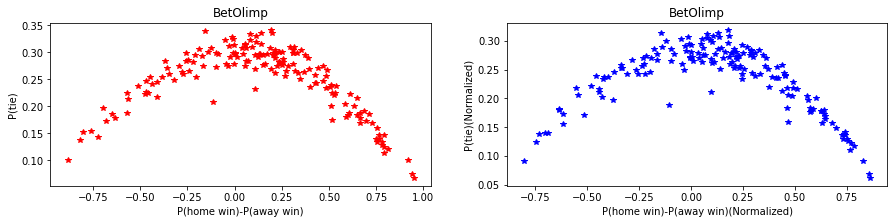

In [55]:
#Task 2-3,4
#plots for BetOlimp
plt.figure(figsize=(15, 3))

plt.subplot(121)

plt.plot(probability_home_wins_BetOlimp-probability_away_wins_BetOlimp,probability_tie_BetOlimp,'r*')
plt.xlabel('P(home win)-P(away win)')
plt.ylabel('P(tie)')
plt.title('BetOlimp')
plt.subplot(122)
plt.plot(Norm_probability_home_wins_BetOlimp-Norm_probability_away_wins_BetOlimp,Norm_probability_tie_BetOlimp,'b*')
plt.xlabel('P(home win)-P(away win)(Normalized)')
plt.ylabel('P(tie)(Normalized)')
plt.title('BetOlimp')
plt.show()

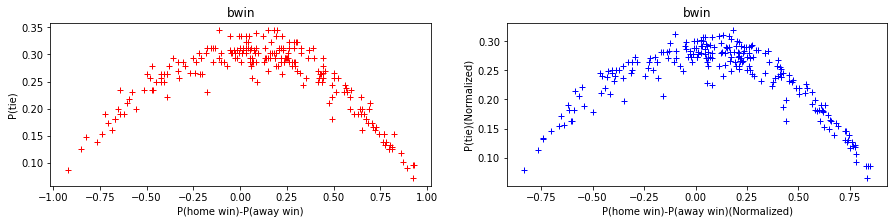

In [56]:
#Task 2-3,4
#plots for bwin
plt.figure(figsize=(15, 3))

plt.subplot(121)

plt.plot(probability_home_wins_bwin-probability_away_wins_bwin,probability_tie_bwin,'r+')
plt.xlabel('P(home win)-P(away win)')
plt.ylabel('P(tie)')
plt.title('bwin')
plt.subplot(122)
plt.plot(Norm_probability_home_wins_bwin-Norm_probability_away_wins_bwin,Norm_probability_tie_bwin,'b+')
plt.xlabel('P(home win)-P(away win)(Normalized)')
plt.ylabel('P(tie)(Normalized)')
plt.title('bwin')
plt.show()

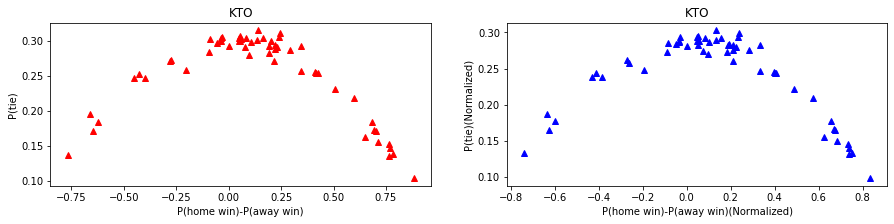

In [57]:
#Task 2-3,4
#plots for KTO
plt.figure(figsize=(15, 3))

plt.subplot(121)

plt.plot(probability_home_wins_KTO-probability_away_wins_KTO,probability_tie_KTO,'r^')
plt.xlabel('P(home win)-P(away win)')
plt.ylabel('P(tie)')
plt.title('KTO')
plt.subplot(122)
plt.plot(Norm_probability_home_wins_KTO-Norm_probability_away_wins_KTO,Norm_probability_tie_KTO,'b^')
plt.xlabel('P(home win)-P(away win)(Normalized)')
plt.ylabel('P(tie)(Normalized)')
plt.title('KTO')
plt.show()

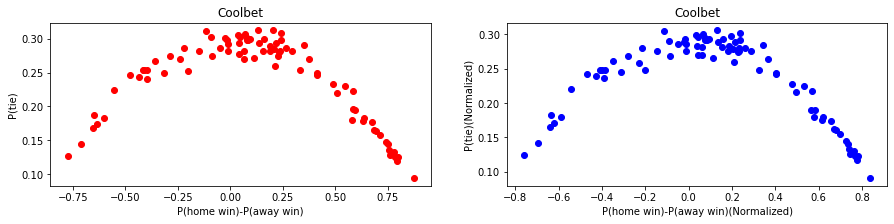

In [58]:
#Task 2-3,4
#plots for Coolbet
plt.figure(figsize=(15, 3))

plt.subplot(121)

plt.plot(probability_home_wins_Coolbet-probability_away_wins_Coolbet,probability_tie_Coolbet,'ro')
plt.xlabel('P(home win)-P(away win)')
plt.ylabel('P(tie)')
plt.title('Coolbet')
plt.subplot(122)
plt.plot(Norm_probability_home_wins_Coolbet-Norm_probability_away_wins_Coolbet,Norm_probability_tie_Coolbet,'bo')
plt.xlabel('P(home win)-P(away win)(Normalized)')
plt.ylabel('P(tie)(Normalized)')
plt.title('Coolbet')
plt.show()

In [59]:
#Task 3: Some bookings will be removed in this case. There is no match with red cards in the first 15 minutes in the data which is
# which is our interes( English Premier League and for the proposed four bookmakers). But there are few matches with goals after the 90_th 
# minute affecting the result of the game. for example (90+2 Lindelof 2-2) we should remove these matches.

betswithoutnoise_data= pd.read_csv("C:/Users/negin/Desktop/betswithoutnoise.csv",sep=';')
betswithoutnoise_data.replace("\,","\.")
#print(betswithoutnoise_data)

,match_id,bookmaker,xx,odd,value,league_id
0,150844,bwin,1486711426,odd_1,"2,55",148
1,150844,bwin,1486711426,odd_x,"3,3",148
2,150844,bwin,1486711426,odd_2,"2,4",148
3,158697,BetOlimp,1488204395,odd_1,"1,17",148
4,158697,bwin,1488204395,odd_1,"1,15",148
...,...,...,...,...,...,...
1585,178781,KTO,1550904568,odd_2,"2,62",148
1586,178781,bwin,1550904568,odd_2,"2,6",148
1587,178783,Coolbet,1550904995,odd_2,"3,58",148
1588,178783,KTO,1550904995,odd_2,"3,49",148


In [63]:
#data after removing noise matches for the bookmaker BetOlimp and English Premier league
BetOlimp_withoutnoise=betswithoutnoise_data.loc[betswithoutnoise_data['bookmaker'] == 'BetOlimp']


BetOlimp_withoutnoise=pd.DataFrame(BetOlimp_withoutnoise)
BetOlimp_withoutnoise=BetOlimp_withoutnoise.sort_values(by=['match_id','odd'])
BetOlimp_withoutnoise.value=BetOlimp_withoutnoise.value.str.replace(',', '.', regex=False)

#print(BetOlimp_withoutnoise)

#data after removing noise matches for the bookmaker bwin and English Premier league
bwin_withoutnoise=betswithoutnoise_data.loc[betswithoutnoise_data['bookmaker'] == 'bwin']


bwin_withoutnoise=pd.DataFrame(bwin_withoutnoise)
bwin_withoutnoise=bwin_withoutnoise.sort_values(by=['match_id','odd'])
bwin_withoutnoise.value=bwin_withoutnoise.value.str.replace(',', '.', regex=False)

#print(bwin_withoutnoise)







#data after removing noise matches for the bookmaker KTO and English Premier league
KTO_withoutnoise=betswithoutnoise_data.loc[betswithoutnoise_data['bookmaker'] == 'KTO']


KTO_withoutnoise=pd.DataFrame(KTO_withoutnoise)
KTO_withoutnoise=KTO_withoutnoise.sort_values(by=['match_id','odd'])
KTO_withoutnoise.value=KTO_withoutnoise.value.str.replace(',', '.', regex=False)

#print(KTO_withoutnoise)



#data after removing noise matches for the bookmaker Coolbet and English Premier league
Coolbet_withoutnoise=betswithoutnoise_data.loc[betswithoutnoise_data['bookmaker'] == 'Coolbet']


Coolbet_withoutnoise=pd.DataFrame(Coolbet_withoutnoise)
Coolbet_withoutnoise=Coolbet_withoutnoise.sort_values(by=['match_id','odd'])
Coolbet_withoutnoise.value=Coolbet_withoutnoise.value.str.replace(',', '.', regex=False)

#print(Coolbet_withoutnoise)

In [64]:
#Adding probability column to the each bookmaker

BetOlimp_withoutnoise['value'] = pd.to_numeric(BetOlimp_withoutnoise['value'])
bwin_withoutnoise['value'] = pd.to_numeric(bwin_withoutnoise['value'])
KTO_withoutnoise['value'] = pd.to_numeric(KTO_withoutnoise['value'])
Coolbet_withoutnoise['value'] = pd.to_numeric(Coolbet_withoutnoise['value'])
x1=1/ BetOlimp_withoutnoise['value'] 
BetOlimp_withoutnoise['probability'] =x1
y1=1/ bwin_withoutnoise['value'] 
bwin_withoutnoise['probability'] =y1
z1=1/ KTO_withoutnoise['value'] 
KTO_withoutnoise['probability'] =z1
w1=1/ Coolbet_withoutnoise['value'] 
Coolbet_withoutnoise['probability'] =w1

In [65]:
from numpy import int64

In [66]:
home_wins_BetOlimp_withoutnoise=BetOlimp_withoutnoise.loc[BetOlimp_withoutnoise['odd'] == 'odd_1']
away_wins_BetOlimp_withoutnoise=BetOlimp_withoutnoise.loc[BetOlimp_withoutnoise['odd'] == 'odd_2']
tie_BetOlimp_withoutnoise=BetOlimp_withoutnoise.loc[BetOlimp_withoutnoise['odd'] == 'odd_x']

probability_home_wins_BetOlimp_withoutnoise=home_wins_BetOlimp_withoutnoise['probability']
probability_home_wins_BetOlimp_withoutnoise=pd.DataFrame(probability_home_wins_BetOlimp_withoutnoise)
probability_home_wins_BetOlimp_withoutnoise=np.asarray(probability_home_wins_BetOlimp_withoutnoise)
#print(probability_home_wins_BetOlimp_withoutnoise)

probability_away_wins_BetOlimp_withoutnoise=away_wins_BetOlimp_withoutnoise['probability']
probability_away_wins_BetOlimp_withoutnoise=pd.DataFrame(probability_away_wins_BetOlimp_withoutnoise)
probability_away_wins_BetOlimp_withoutnoise=np.asarray(probability_away_wins_BetOlimp_withoutnoise)

#print(probability_away_wins_BetOlimp_withoutnoise)
probability_tie_BetOlimp_withoutnoise=tie_BetOlimp_withoutnoise['probability']
probability_tie_BetOlimp_withoutnoise=pd.DataFrame(probability_tie_BetOlimp_withoutnoise)
probability_tie_BetOlimp_withoutnoise=np.asarray(probability_tie_BetOlimp_withoutnoise)

#print(probability_tie_BetOlimp_withoutnoise)

summation_probabilities_BetOlimp_withoutnoise=probability_tie_BetOlimp_withoutnoise+probability_away_wins_BetOlimp_withoutnoise+probability_home_wins_BetOlimp_withoutnoise
#print(summation_probabilities_BetOlimp_withoutnoise)
#len(summation_probabilities_BetOlimp_withoutnoise)
Norm_probability_home_wins_BetOlimp_withoutnoise=probability_home_wins_BetOlimp_withoutnoise/summation_probabilities_BetOlimp_withoutnoise
Norm_probability_away_wins_BetOlimp_withoutnoise=probability_away_wins_BetOlimp_withoutnoise/summation_probabilities_BetOlimp_withoutnoise
Norm_probability_tie_BetOlimp_withoutnoise=probability_tie_BetOlimp_withoutnoise/summation_probabilities_BetOlimp_withoutnoise

In [67]:
home_wins_bwin_withoutnoise=bwin_withoutnoise.loc[bwin_withoutnoise['odd'] == 'odd_1']
away_wins_bwin_withoutnoise=bwin_withoutnoise.loc[bwin_withoutnoise['odd'] == 'odd_2']
tie_bwin_withoutnoise=bwin_withoutnoise.loc[bwin_withoutnoise['odd'] == 'odd_x']

probability_home_wins_bwin_withoutnoise=home_wins_bwin_withoutnoise['probability']
probability_home_wins_bwin_withoutnoise=pd.DataFrame(probability_home_wins_bwin_withoutnoise)
probability_home_wins_bwin_withoutnoise=np.asarray(probability_home_wins_bwin_withoutnoise)
#print(probability_home_wins_bwin_withoutnoise)

probability_away_wins_bwin_withoutnoise=away_wins_bwin_withoutnoise['probability']
probability_away_wins_bwin_withoutnoise=pd.DataFrame(probability_away_wins_bwin_withoutnoise)
probability_away_wins_bwin_withoutnoise=np.asarray(probability_away_wins_bwin_withoutnoise)

#print(probability_away_wins_bwin_withoutnoise)
probability_tie_bwin_withoutnoise=tie_bwin_withoutnoise['probability']
probability_tie_bwin_withoutnoise=pd.DataFrame(probability_tie_bwin_withoutnoise)
probability_tie_bwin_withoutnoise=np.asarray(probability_tie_bwin_withoutnoise)

#print(probability_tie_bwin_withoutnoise)

summation_probabilities_bwin_withoutnoise=probability_tie_bwin_withoutnoise+probability_away_wins_bwin_withoutnoise+probability_home_wins_bwin_withoutnoise
#print(summation_probabilities_bwin_withoutnoise)
Norm_probability_home_wins_bwin_withoutnoise=probability_home_wins_bwin_withoutnoise/summation_probabilities_bwin_withoutnoise
Norm_probability_away_wins_bwin_withoutnoise=probability_away_wins_bwin_withoutnoise/summation_probabilities_bwin_withoutnoise
Norm_probability_tie_bwin_withoutnoise=probability_tie_bwin_withoutnoise/summation_probabilities_bwin_withoutnoise

In [68]:
home_wins_KTO_withoutnoise=KTO_withoutnoise.loc[KTO_withoutnoise['odd'] == 'odd_1']
away_wins_KTO_withoutnoise=KTO_withoutnoise.loc[KTO_withoutnoise['odd'] == 'odd_2']
tie_KTO_withoutnoise=KTO_withoutnoise.loc[KTO_withoutnoise['odd'] == 'odd_x']

probability_home_wins_KTO_withoutnoise=home_wins_KTO_withoutnoise['probability']
probability_home_wins_KTO_withoutnoise=pd.DataFrame(probability_home_wins_KTO_withoutnoise)
probability_home_wins_KTO_withoutnoise=np.asarray(probability_home_wins_KTO_withoutnoise)
#print(probability_home_wins_KTO_withoutnoise)

probability_away_wins_KTO_withoutnoise=away_wins_KTO_withoutnoise['probability']
probability_away_wins_KTO_withoutnoise=pd.DataFrame(probability_away_wins_KTO_withoutnoise)
probability_away_wins_KTO_withoutnoise=np.asarray(probability_away_wins_KTO_withoutnoise)

#print(probability_away_wins_KTO_withoutnoise)
probability_tie_KTO_withoutnoise=tie_KTO_withoutnoise['probability']
probability_tie_KTO_withoutnoise=pd.DataFrame(probability_tie_KTO_withoutnoise)
probability_tie_KTO_withoutnoise=np.asarray(probability_tie_KTO_withoutnoise)

#print(probability_tie_KTO_withoutnoise)

summation_probabilities_KTO_withoutnoise=probability_tie_KTO_withoutnoise+probability_away_wins_KTO_withoutnoise+probability_home_wins_KTO_withoutnoise
#print(summation_probabilities_KTO_withoutnoise)
#len(summation_probabilities_KTO_withoutnoise)
Norm_probability_home_wins_KTO_withoutnoise=probability_home_wins_KTO_withoutnoise/summation_probabilities_KTO_withoutnoise
Norm_probability_away_wins_KTO_withoutnoise=probability_away_wins_KTO_withoutnoise/summation_probabilities_KTO_withoutnoise
Norm_probability_tie_KTO_withoutnoise=probability_tie_KTO_withoutnoise/summation_probabilities_KTO_withoutnoise

In [69]:
home_wins_Coolbet_withoutnoise=Coolbet_withoutnoise.loc[Coolbet_withoutnoise['odd'] == 'odd_1']
away_wins_Coolbet_withoutnoise=Coolbet_withoutnoise.loc[Coolbet_withoutnoise['odd'] == 'odd_2']
tie_Coolbet_withoutnoise=Coolbet_withoutnoise.loc[Coolbet_withoutnoise['odd'] == 'odd_x']

probability_home_wins_Coolbet_withoutnoise=home_wins_Coolbet_withoutnoise['probability']
probability_home_wins_Coolbet_withoutnoise=pd.DataFrame(probability_home_wins_Coolbet_withoutnoise)
probability_home_wins_Coolbet_withoutnoise=np.asarray(probability_home_wins_Coolbet_withoutnoise)
#print(probability_home_wins_Coolbet_withoutnoise)

probability_away_wins_Coolbet_withoutnoise=away_wins_Coolbet_withoutnoise['probability']
probability_away_wins_Coolbet_withoutnoise=pd.DataFrame(probability_away_wins_Coolbet_withoutnoise)
probability_away_wins_Coolbet_withoutnoise=np.asarray(probability_away_wins_Coolbet_withoutnoise)

#print(probability_away_wins_Coolbet_withoutnoise)
probability_tie_Coolbet_withoutnoise=tie_Coolbet_withoutnoise['probability']
probability_tie_Coolbet_withoutnoise=pd.DataFrame(probability_tie_Coolbet_withoutnoise)
probability_tie_Coolbet_withoutnoise=np.asarray(probability_tie_Coolbet_withoutnoise)

#print(probability_tie_Coolbet_withoutnoise)

summation_probabilities_Coolbet_withoutnoise=probability_tie_Coolbet_withoutnoise+probability_away_wins_Coolbet_withoutnoise+probability_home_wins_Coolbet_withoutnoise
#print(summation_probabilities_Coolbet_withoutnoise)
#len(summation_probabilities_Coolbet_withoutnoise)
Norm_probability_home_wins_Coolbet_withoutnoise=probability_home_wins_Coolbet_withoutnoise/summation_probabilities_Coolbet_withoutnoise
Norm_probability_away_wins_Coolbet_withoutnoise=probability_away_wins_Coolbet_withoutnoise/summation_probabilities_Coolbet_withoutnoise
Norm_probability_tie_Coolbet_withoutnoise=probability_tie_Coolbet_withoutnoise/summation_probabilities_Coolbet_withoutnoise

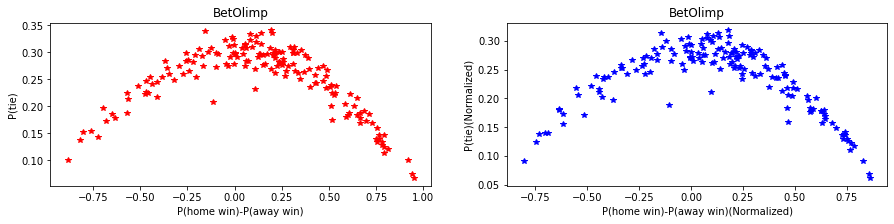

In [70]:
#Task 3
#plots for BetOlimp(without noise)
plt.figure(figsize=(15, 3))

plt.subplot(121)

plt.plot(probability_home_wins_BetOlimp_withoutnoise-probability_away_wins_BetOlimp_withoutnoise,probability_tie_BetOlimp_withoutnoise,'r*')
plt.xlabel('P(home win)-P(away win)')
plt.ylabel('P(tie)')
plt.title('BetOlimp')
plt.subplot(122)
plt.plot(Norm_probability_home_wins_BetOlimp_withoutnoise-Norm_probability_away_wins_BetOlimp_withoutnoise,Norm_probability_tie_BetOlimp_withoutnoise,'b*')
plt.xlabel('P(home win)-P(away win)(Normalized)')
plt.ylabel('P(tie)(Normalized)')
plt.title('BetOlimp')
plt.show()

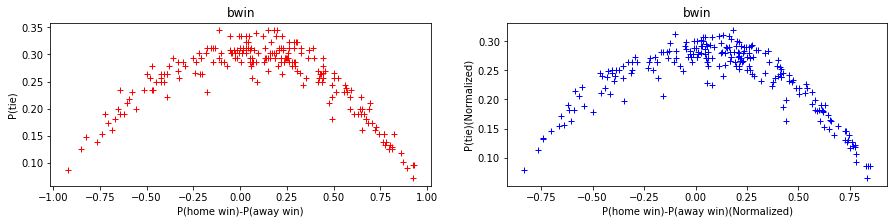

In [71]:
#Task 3
#plots for bwin (without noise)
plt.figure(figsize=(15, 3))

plt.subplot(121)

plt.plot(probability_home_wins_bwin_withoutnoise-probability_away_wins_bwin_withoutnoise,probability_tie_bwin_withoutnoise,'r+')
plt.xlabel('P(home win)-P(away win)')
plt.ylabel('P(tie)')
plt.title('bwin')
plt.subplot(122)
plt.plot(Norm_probability_home_wins_bwin_withoutnoise-Norm_probability_away_wins_bwin_withoutnoise,Norm_probability_tie_bwin_withoutnoise,'b+')
plt.xlabel('P(home win)-P(away win)(Normalized)')
plt.ylabel('P(tie)(Normalized)')
plt.title('bwin')
plt.show()

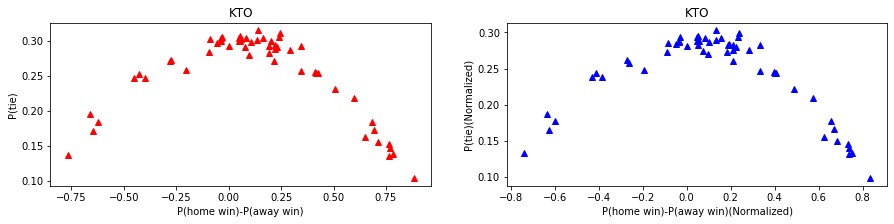

In [72]:
#Task 3
#plots for KTO (without noise)
plt.figure(figsize=(15, 3))

plt.subplot(121)

plt.plot(probability_home_wins_KTO_withoutnoise-probability_away_wins_KTO_withoutnoise,probability_tie_KTO_withoutnoise,'r^')
plt.xlabel('P(home win)-P(away win)')
plt.ylabel('P(tie)')
plt.title('KTO')
plt.subplot(122)
plt.plot(Norm_probability_home_wins_KTO_withoutnoise-Norm_probability_away_wins_KTO_withoutnoise,Norm_probability_tie_KTO_withoutnoise,'b^')
plt.xlabel('P(home win)-P(away win)(Normalized)')
plt.ylabel('P(tie)(Normalized)')
plt.title('KTO')
plt.show()

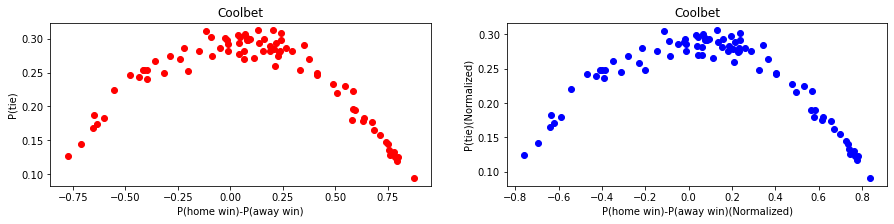

In [73]:
#Task 3
#plots for Coolbet (without noise)
plt.figure(figsize=(15, 3))

plt.subplot(121)

plt.plot(probability_home_wins_Coolbet_withoutnoise-probability_away_wins_Coolbet_withoutnoise,probability_tie_Coolbet_withoutnoise,'ro')
plt.xlabel('P(home win)-P(away win)')
plt.ylabel('P(tie)')
plt.title('Coolbet')
plt.subplot(122)
plt.plot(Norm_probability_home_wins_Coolbet_withoutnoise-Norm_probability_away_wins_Coolbet_withoutnoise,Norm_probability_tie_Coolbet_withoutnoise,'bo')
plt.xlabel('P(home win)-P(away win)(Normalized)')
plt.ylabel('P(tie)(Normalized)')
plt.title('Coolbet')
plt.show()